# Function to determine whether to accept or reject null hypotheses and distribution score considering Z or T distribution

In [1]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
from math import sqrt

In [2]:
df=pd.read_csv('HouseData.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
dt=pd.read_excel('Student-t-distribution-table.xlsx','Sheet1')


# Here we will consider SalePrice in our analysis

In [4]:
data=df.SalePrice
data

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

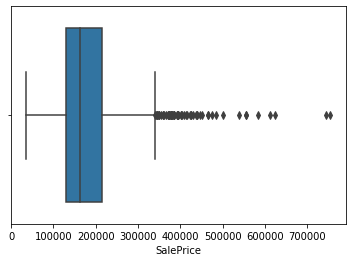

In [12]:
sns.boxplot(x='SalePrice',data=df)

In [ ]:
# As the distribution is skewed and contains outliers so we will take sample size as n=50
# Considering 95% confidence level

In [5]:
def hyp_test(df,alpha):
    
    if data.isnull().sum()!=0:
        data.fillna(value=data.describe().loc['mean'],inplace=True)
    # This will remove NaN values from the population dataset
        
    mean=data.describe().loc['mean']
    sigma=data.describe().loc['std']
    n=50
    
    sample=[]
    for i in range(n):
        sample.append(random.randint(1, data.shape[0]))
        #Slecting 50 random values from our population data of 1460 
        
    sample_data=data.loc[sample]
    sample_mean=sample_data.describe().loc['mean']
    # These all will give requird values to be put in the Z-stats or T-stats formula
    
    distribution_score=(sample_mean-mean)/(sigma/sqrt(n))
    print('Distribution score is : ',distribution_score)

    if n>=30:
        print('Considering Z-distribution')
        d={0.05:1.68,0.025:1.96}
        z=d[alpha]
        if z==1.68:
            if distribution_score<z:
                print('Null Hypotheses is accepted')
            else:
                print('Null Hypotheses is rejected')
        else:
            if -z<distribution_score<z:
                print('Null Hypotheses is accepted')
            else:
                print('Null Hypotheses is rejected')
    else:
        print('Considering T-distribution')
        t=dt[alpha].loc[n-1]
        if alpha==0.05:
            if distribution_score<t:
                print('Null Hypotheses is accepted')
            else:
                print('Null Hypotheses is rejected')
        else:
            if -t<distribution_score<t:
                print('Null Hypotheses is accepted')
            else:
                print('Null Hypotheses is rejected')
        

In [6]:
hyp_test(data,0.05)

Distribution score is :  0.6385767119899454
Considering Z-distribution
Null Hypotheses is accepted
